In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random

# Q2

In [2]:
# set OS-independent paths
train_path = os.path.join('HW1_data', '1', 'train_1_5.csv')
test_path = os.path.join('HW1_data', '1', 'test_1_5.csv')
             
# Read the data
train_data = np.genfromtxt(train_path, delimiter=',')
test_data = np.genfromtxt(test_path, delimiter=',')

In [3]:
def init_params():
    theta = np.array([0.0, 0.0])
    offset = 0.0
    return theta, offset


def train_perceptron(theta, offset, train_data, epochs):
    xs = train_data[:, :-1]  # training inputs
    ys = train_data[:, -1]  
    for epoch in range(epochs):
        # print(f'Epoch {epoch}')
        for i, (x, y) in enumerate(zip(xs, ys)):
            # print(f'Example {i}: {x}, {y}', end=' ')
            if y * (theta.dot(x) + offset) <= 0.0:  # wrong prediction
                theta += y*x
                offset += y
                # print('updated weights and offset:', theta, offset)
            # else:
                # print('correct')
    return theta, offset


def test_perceptron(theta, offset, test_data):
    xs = test_data[:, :-1]  # training inputs
    ys = test_data[:, -1]
    test_count = len(test_data)
    # The below line is a vectorized way of checking if y(θx+θo) > 0 for all x and y
    results = ys * (xs.dot(theta) + offset) > 0.0  # returns True/False array
    correct = results.sum()
    return correct / test_count, correct, test_count

## (a) 1 epoch 

In [4]:
theta, offset = init_params()
theta, offset = train_perceptron(theta, offset, train_data, epochs=1)
acc, correct, test_count = test_perceptron(theta, offset, test_data)
print(f'Results after 1 epoch:\n'
      f'Theta {theta}, offset {offset}\n'
      f'Test accuracy {acc*100}% ({correct} of {test_count})\n')

Results after 1 epoch:
Theta [-2.4483233  -5.88190688], offset 0.0
Test accuracy 96.7065868263473% (969 of 1002)



## (b) 5 epochs 

In [5]:
theta, offset = init_params()
theta, offset = train_perceptron(theta, offset, train_data, epochs=5)
acc, correct, test_count = test_perceptron(theta, offset, test_data)
print(f'Results after 5 epochs:\n'
      f'Theta {theta}, offset {offset}\n'
      f'Test accuracy {acc*100}% ({correct} of {test_count})\n')

Results after 5 epochs:
Theta [-2.05895878 -8.83521606], offset 1.0
Test accuracy 96.7065868263473% (969 of 1002)



# Q3

In [6]:
# set OS-independent paths
x_path = os.path.join('HW1_data', '2', 'hw1x.dat')
y_path = os.path.join('HW1_data', '2', 'hw1y.dat')
             
# Read the data
x1 = np.genfromtxt(x_path)
y = np.genfromtxt(y_path)
n = len(x1)
X = np.c_[np.ones(n), x1]  # c_ combines two 1D arrays into columns of a 2D array
learning_rate = 0.01

def plot_regression(x1, pred_y, y, title=''):
    plt.scatter(x1, y)
    plt.plot(x1, pred_y, 'r')
    plt.title(title)
    plt.show()
    
def calc_half_mse(pred_y, y, n):
    diff = y - pred_y
    return diff.dot(diff) / (2*n)  # allows for vector diff

## (a) Closed form

In [7]:
def closed_form(X, y):
    # You don't need n to solve for theta. Indeed, if the inputs
    # are very small, dividing by n can cause float rounding errors.
    A = X.T.dot(X)
    b = X.T.dot(y)
    # theta = np.linalg.inv(A).dot(b)
    theta = np.linalg.pinv(A).dot(b)  # more accurate inverse
    return theta

Closed Form solution
Theta: [3.2447227  1.78157138]
Training error: 0.5812605752543937


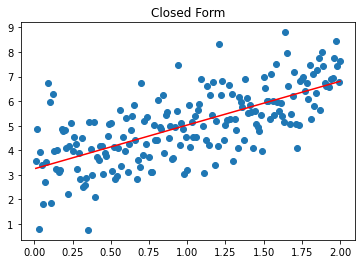

In [8]:
theta = closed_form(X, y)
pred_y = X.dot(theta)
print(f'Closed Form solution\n'
      f'Theta: {theta}\n'
      f'Training error: {calc_half_mse(pred_y, y, n)}')
plot_regression(x1, pred_y, y, title='Closed Form')

## (b) Gradient descent

Batch Gradient Descent, 5 epochs
After epoch 0:
theta = [0.05035202 0.0565422 ], error = 13.219917694196358
After epoch 1:
theta = [0.09963227 0.11181881], error = 12.677517326806722
After epoch 2:
theta = [0.14786419 0.16585759], error = 12.158610566668756
After epoch 3:
theta = [0.1950707  0.21868571], error = 11.662179145218186
After epoch 4:
theta = [0.24127422 0.27032973], error = 11.187248930078479
Min error: 11.187248930078479


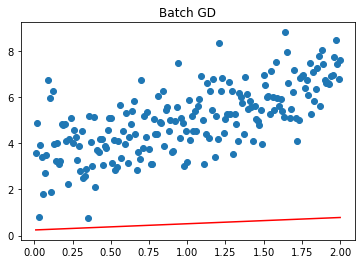

In [9]:
theta = np.zeros(2)
def batch_gd(theta, X, y, n, learning_rate, epochs):
    min_error = float('inf')
    error = 0  # doesn't matter
    for epoch in range(epochs):
        theta += learning_rate / n * (y - X.dot(theta)).dot(X)
        error = calc_half_mse(X.dot(theta), y, n)
        print(f'After epoch {epoch}:\ntheta = {theta}, error = {error}')
        if error < min_error:
            min_error = error
    print(f'Min error: {min_error}')
    return theta, min_error, error

print('Batch Gradient Descent, 5 epochs')
batch_gd(theta, X, y, n, learning_rate, epochs=5)

pred_y = X.dot(theta)
plot_regression(x1, pred_y, y, title='Batch GD')

## (b) Stochastic gradient descent

Stochastic Gradient Descent, 5 epochs:
Theta [3.0711403  1.98067554]
5 epochs error: 0.5882190711036057
Minimum error: 0.5867626871432634


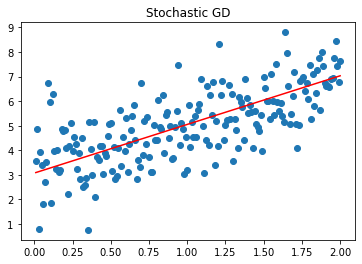

In [10]:
theta = np.zeros(2)
def stochastic_gd(theta, X, y, n, learning_rate, epochs):
    # When drawing with replacement, 1 epoch = n samples
    total_samples = n * epochs
    min_error = float('inf')
    error = 0  # doesn't matter
    for sample in range(total_samples):
        i = random.randrange(0, n)
        theta += learning_rate * (y[i] - X[i].dot(theta)) * X[i]
        # print(theta)
        error = calc_half_mse(X.dot(theta), y, n)
        if min_error > error:
            min_error = error
    print(f'Stochastic Gradient Descent, 5 epochs:\n'
          f'Theta {theta}\n'
          f'5 epochs error: {error}\n'
          f'Minimum error: {min_error}')
    return theta, min_error, error

stochastic_gd(theta, X, y, n, learning_rate, epochs=5)

pred_y = X.dot(theta)
plot_regression(x1, pred_y, y, title='Stochastic GD')

## (c) Polynomial Regression

Closed Form solution for order 2
Theta: [3.58076915 0.78341361 0.49659591]
Training error: 0.5703016121648222



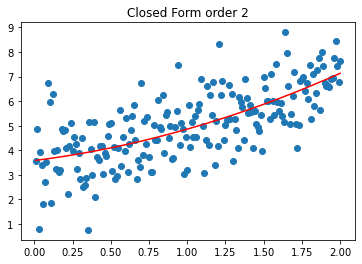

Closed Form solution for order 3
Theta: [3.52394943 1.11846512 0.08090267 0.13787504]
Training error: 0.570084436469135



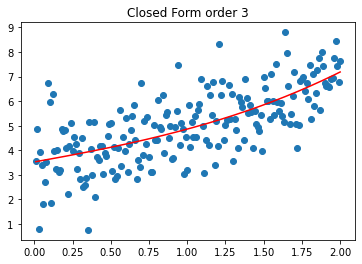

Closed Form solution for order 4
Theta: [ 3.85376334 -2.09126966  7.22513464 -5.38187521  1.3730722 ]
Training error: 0.5646163879286428



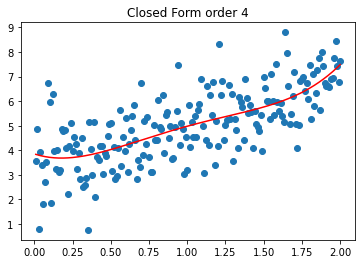

Closed Form solution for order 5
Theta: [ 3.7181433  -0.1354222   0.48154349  3.53113473 -3.60926334  0.99150956]
Training error: 0.5638968184749199



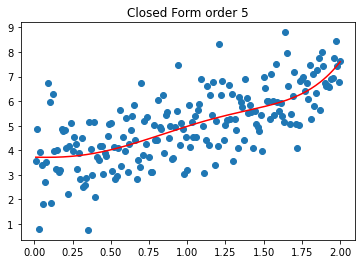

Closed Form solution for order 6
Theta: [  3.43194652   5.56010882 -27.43134431  58.72902198 -54.95621237
  23.44890139  -3.72427725]
Training error: 0.5613433038902952



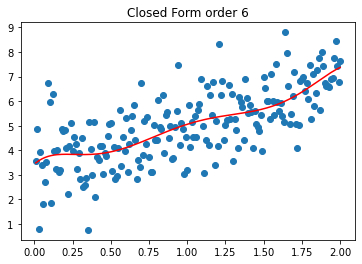

Closed Form solution for order 7
Theta: [   2.98164476   17.31146567 -104.72226819  270.37448227 -343.19080317
  229.4867911   -77.69331826   10.51443372]
Training error: 0.5562352515818901



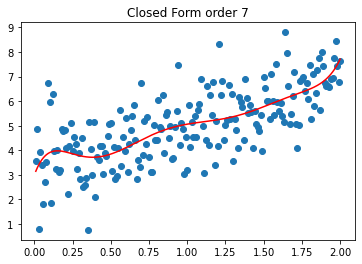

Closed Form solution for order 8
Theta: [   2.63575905   28.70146056 -201.17709446  617.80646467 -987.05321789
  893.36177826 -462.3135891   127.58262956  -14.56072104]
Training error: 0.5537805800022018



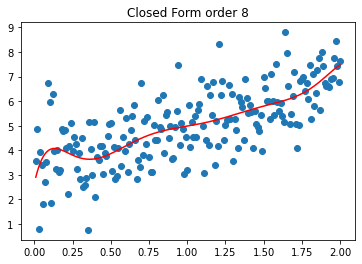

Closed Form solution for order 9
Theta: [    2.40966223    37.81707788  -297.48027134  1057.55247498
 -2043.92922974  2357.94316101 -1673.08885193   716.7234726
  -170.17014503    17.20390034]
Training error: 0.5529231052265103



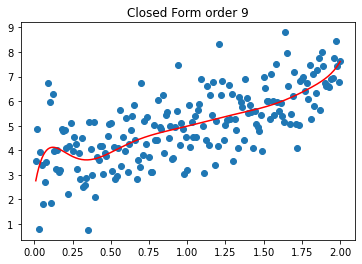

Closed Form solution for order 10
Theta: [   2.50100163   33.27113274 -237.4843936   712.81185722 -988.41844177
  455.20342827  445.18925953 -755.93045044  452.16578484 -128.98366785
   14.63520259]
Training error: 0.5526261910178768



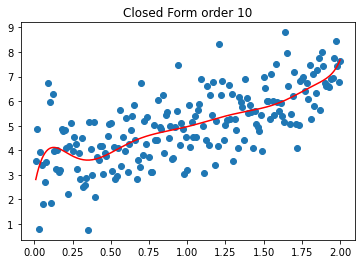

Closed Form solution for order 11
Theta: [    2.37066393    38.90650606  -301.05976486  1016.34048462
 -1714.19842529  1334.58798218    75.12160492 -1094.33145142
   997.53112793  -441.32972717   100.46746826    -9.42281437]
Training error: 0.5524240479675722



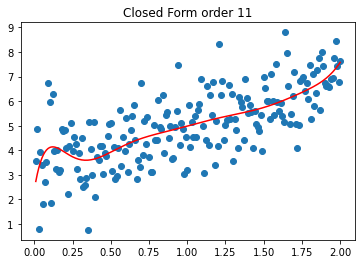

Closed Form solution for order 12
Theta: [    2.3216428     39.99809742  -299.85698891   934.83560181
 -1295.62028503   460.94245911   745.3471756   -626.83435822
  -437.91659164   876.85733795  -523.99228668   144.59321594
   -15.68478322]
Training error: 0.551121016949114



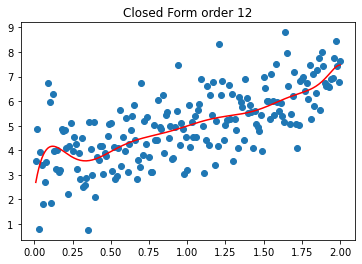

Closed Form solution for order 13
Theta: [   2.39359127   36.258178   -251.43118477  683.89432907 -699.19304276
  -97.6770277   543.76580429   88.60322297 -482.3682785   -59.06285954
  517.30789948 -380.82522964  116.86613464  -13.56358469]
Training error: 0.5498817956700389



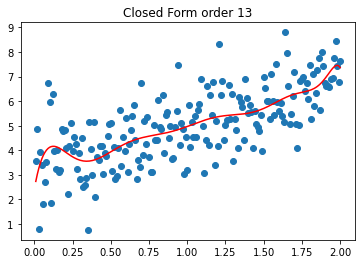

Closed Form solution for order 14
Theta: [   2.5544316    29.9212383  -188.37360382  436.38860321 -293.43078232
 -224.34007835  199.84989643  242.26578236  -93.08179998 -258.43281937
   48.11419773  271.8668251  -237.59070587   78.81013489   -9.58655512]
Training error: 0.5497942813163088



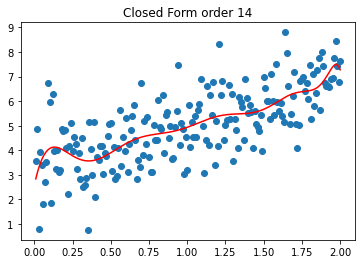

Closed Form solution for order 15
Theta: [   2.76892078   22.72125006 -128.61662388  249.49599552  -85.6683507
 -169.77920246   11.46722853  145.89072132   73.96065855  -93.17864466
 -119.79703951   55.42771912  133.99420261 -135.46849823   47.70696259
   -6.00922397]
Training error: 0.5513490354158077



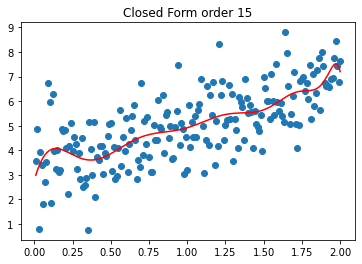

Lowest error occurs at order 14 and then increases


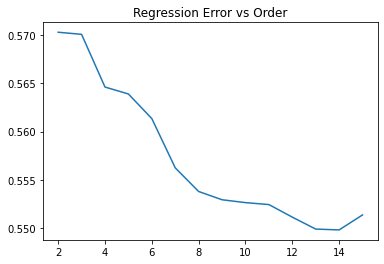

In [11]:
def PolyRegress(x1, y, d):
    errors = []
    X16 = np.ones((n, 16))  # X16 columns are X^0, X^1, X2, ... X^15
    X16[:, 1] = x1
    for order in range(2, d+1):
        X16[:, order] = x1 * X16[:, order-1]
    for order in range(2, d+1):
        X = X16[:, :order+1]
        theta = closed_form(X, y)
        pred_y = X.dot(theta)
        error = calc_half_mse(pred_y, y, len(y))
        errors.append(error)
        print(f'Closed Form solution for order {order}\n'
              f'Theta: {theta}\n'
              f'Training error: {error}\n')
        plot_regression(x1, pred_y, y, title=f'Closed Form order {order}')
    return errors


def plot_errors(d, errors):
    plt.plot(list(range(2, d+1)), errors)
    plt.title('Regression Error vs Order')
    # plt.yscale('log')
    plt.show()
    
d = 15
errors = PolyRegress(x1, y, d)
best_order = errors.index(min(errors)) + 2
print(f'Lowest error occurs at order {best_order} and then increases')
plot_errors(d, errors)

# Q4

In [12]:
# set OS-independent paths
x_path = os.path.join('HW1_data', '3', 'hw1_ridge_x.dat')
y_path = os.path.join('HW1_data', '3', 'hw1_ridge_y.dat')
             
# Read the data. Note that x_0 (column of 1s) is at the end.
X = np.genfromtxt(x_path, delimiter=',')
Y = np.genfromtxt(y_path)
val_size = 10
tX = X[val_size:, :]
tY = Y[val_size:]
vX = X[:val_size, :]
vY = Y[:val_size]

In [13]:
print(vX.shape)
print(tX.shape)
print(vY.shape)
print(tY.shape)

(10, 4)
(40, 4)
(10,)
(40,)


## (a)

In [14]:
def ridge_regression(tX, tY, λ):  # use λ as l is confusing
    tn = tX.shape[0]
    I = np.eye(tX.shape[1])
    theta = np.linalg.inv(tn * λ * I + tX.T @ tX) @ tX.T @ tY
    return theta

theta = ridge_regression(tX, tY, λ=0.15)
print(f'Theta for λ = 0.15: {theta}')
# error = calc_half_mse(tX.dot(theta), tY, tX.shape[1]) + theta.dot(theta)/2
# print(f'Error: {error}')

Theta for λ = 0.15: [-0.57939825  1.15033028  0.04934122 -1.59867896]


# (b)

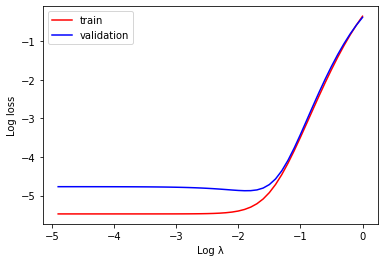

Best validation λ: 10^-1.90 = 0.012589254117941668


In [15]:
tn = tX.shape[0]
vn = vX.shape[0]
tloss = []
vloss = []
index = -np.arange(0, 5, 0.1)
for i in index:
    w = ridge_regression(tX, tY, 10**i)
    tloss.append(((tX.dot(w) - tY) ** 2).sum() / tn / 2)
    vloss.append(((vX.dot(w) - vY) ** 2).sum() / vn / 2)



plt.plot(index, np.log(tloss), 'r', label='train')
plt.plot(index, np.log(vloss), 'b', label='validation')
plt.xlabel('Log λ')
plt.ylabel('Log loss')
plt.legend()
plt.show()

best_logλ = index[vloss.index(min(vloss))]
print(f'Best validation λ: 10^{best_logλ:.2f} = {10**best_logλ}')